In [1]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.base import clone
from sklearn.metrics import confusion_matrix, precision_recall_curve

In [2]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
x, y = mnist['data'], mnist['target']
x.shape, y.shape

((70000, 784), (70000,))

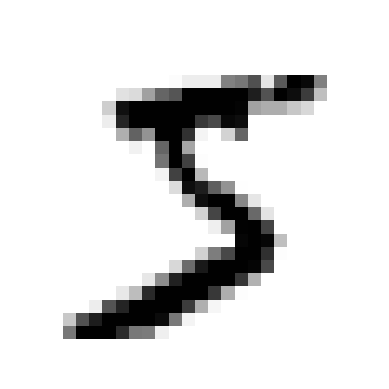

In [4]:
some_dgt = x[0]
some_dgt_img = some_dgt.reshape(28,28)

plt.imshow(some_dgt_img, cmap="binary")
plt.axis("off")
plt.show()

In [5]:
y[0]

'5'

In [6]:
y = y.astype(np.uint8)

In [7]:
x_train, x_test, y_train, y_test = x[:60000], x[60000:], y[:60000], y[60000:]

### Binary classifier for only detecting 5

In [8]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [9]:
# simple SGDClf
sgd_clf = SGDClassifier()
sgd_clf.fit(x_train, y_train_5)

SGDClassifier()

In [10]:
sgd_clf.predict([some_dgt])

array([ True])

In [11]:
# performance measure
skfolds = StratifiedKFold(n_splits=3)

for train_idx, test_idx in skfolds.split(x_train, y_train_5):
    clone_clf = clone(sgd_clf)

    x_train_folds = x_train[train_idx]
    x_test_folds = x_train[test_idx]
    y_train_folds = y_train_5[train_idx]
    y_test_folds = y_train_5[test_idx]

    clone_clf.fit(x_train_folds, y_train_folds)
    y_pred = clone_clf.predict(x_test_folds)
    n_correct = sum(y_pred == y_test_folds)
    print(n_correct / len(y_pred))

0.96875
0.96755
0.96315


In [12]:
# using cross_val_score
cross_val_score(sgd_clf, x_train, y_train_5, cv=3, scoring="accuracy")

array([0.93845, 0.9587 , 0.9437 ])

In [13]:
y_train_pred = cross_val_predict(sgd_clf, x_train, y_train_5, cv=3)

In [14]:
y_train_pred

array([False, False, False, ...,  True, False, False])

In [15]:
confusion_matrix(y_train_5, y_train_pred)

array([[53562,  1017],
       [ 1322,  4099]])

In [16]:
# this is added to get the decision scores instead of values like True, False, etc
y_scores = cross_val_predict(sgd_clf, x_train, y_train_5, cv=3, method='decision_function')

In [17]:
# precision recall curve
precisions, recalls, threshs = precision_recall_curve(y_train_5, y_scores)

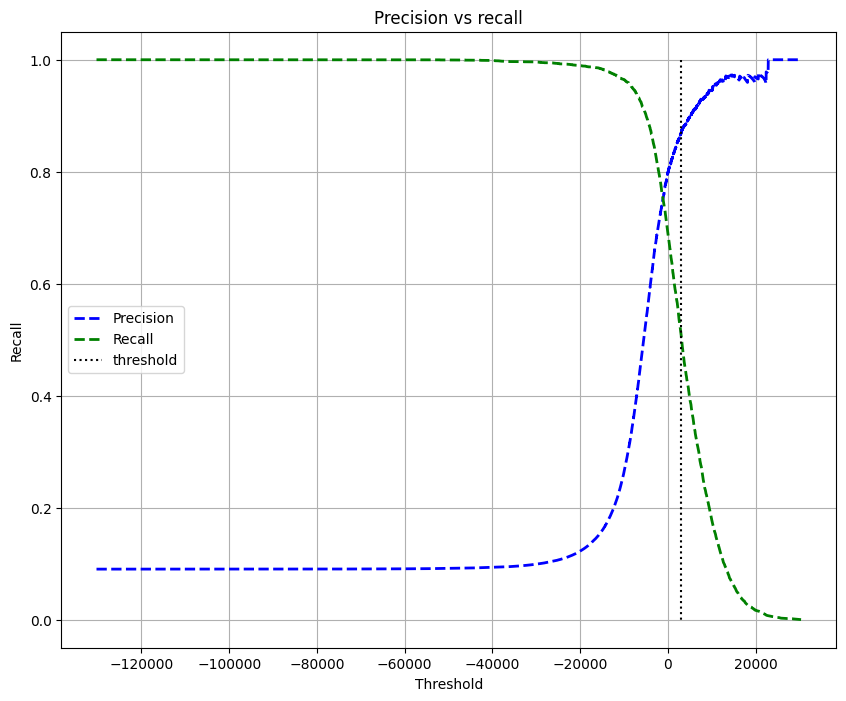

In [29]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(threshs, precisions[:-1], "b--", label="Precision", linewidth=2)
ax.plot(threshs, recalls[:-1], "g--", label="Recall", linewidth=2)
ax.vlines(3000, 1.0, 0, "k", "dotted", label="threshold")
ax.set(xlabel='Threshold', ylabel='Recall', title='Precision vs recall')
ax.legend(loc='center left')
ax.grid()
plt.show()

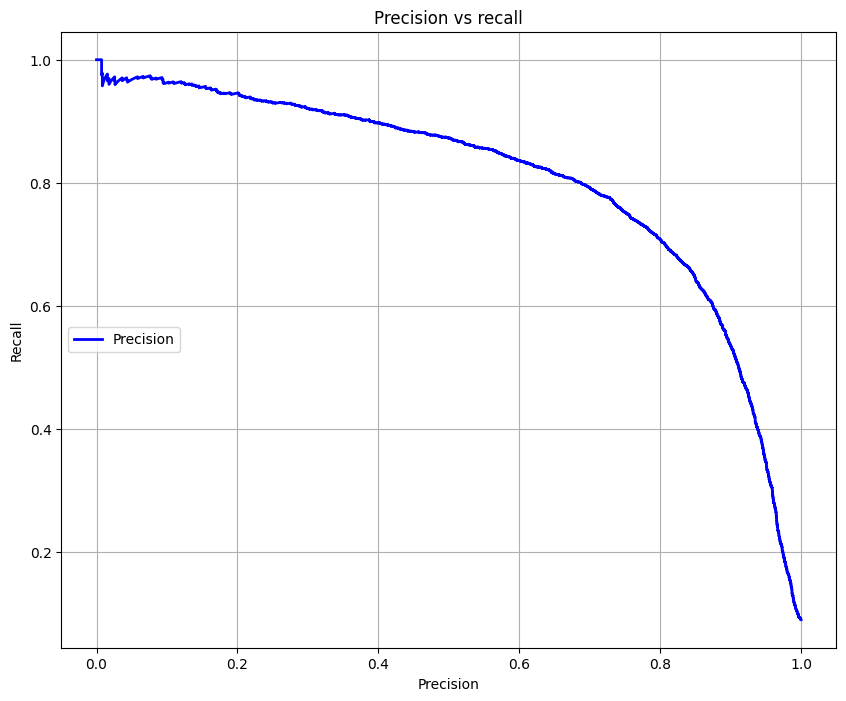

In [32]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(recalls, precisions, "b", label="Precision", linewidth=2)
ax.set(xlabel='Precision', ylabel='Recall', title='Precision vs recall')
ax.legend(loc='center left')
ax.grid()
plt.show()